# Notebook for section 3.1

In [3]:
%matplotlib inline
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese

# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

def try_train(siamese_net, epochs=400, epoch_shuffle=True, verbose=0):
    """
    Try to train the siamese_net model. If success, return train history. Otherwise, return None.
    """
    try:
        print("Training...")
        history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=epochs, epoch_shuffle=epoch_shuffle, verbose=verbose)
        print("Training End")
        return history
    except Exception as e:
        print(f"Got exception while training: {type(e).__name__}")
        return None

Data already exist


## Original Paper Model (without modifications)

In [2]:
s_net = Siamese()
s_net.build('paper_network')
print("Original Paper Model:")
s_net.model.summary()

history = try_train(s_net)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

Original Paper Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         605178688   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]    

## Shrink the fully connected layer

Dense size is 512 instead of 4096:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 512)          76692800    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 512)          0           sequentia

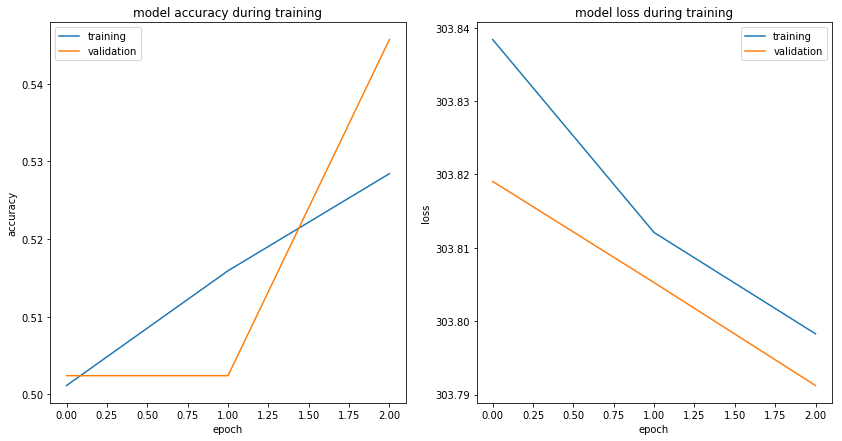

In [4]:

s_net = Siamese()
s_net.build('paper_network', dense_size=512)
print("Dense size is 512 instead of 4096:")
s_net.model.summary()

history = try_train(s_net, epochs=3)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)


## Reduce filter size at the first layer

In [4]:
s_net = Siamese()
s_net.build('paper_network')
print("Reduce filter size at the first layer")
s_net.model.summary()

history = try_train(s_net)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

Dense size is 512 instead of 4096:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 4096)         1007743616  input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 4096)         0           sequentia